In [6]:

from utils import *

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import lightgbm as lgb

%matplotlib inline
data_path = 'data/'
seed=1204

submission_path=data_path+'submission/'
fold_path = 'fold_data/'


cv_loss_list=[]
n_iteration_list=[]
def score(params):
    print("Training with params: ")
    print(params)
    cv_losses=[]
    cv_iteration=[]
    for (train_idx,val_idx) in cv:
        cv_train = X.iloc[train_idx]
        cv_val = X.iloc[val_idx]
        cv_y_train = y[train_idx]
        cv_y_val = y[val_idx]
        lgb_model = lgb.train(params, lgb.Dataset(cv_train, label=cv_y_train), 2000, 
                          lgb.Dataset(cv_val, label=cv_y_val), verbose_eval=False, 
                          early_stopping_rounds=100)
       
        train_pred = lgb_model.predict(cv_train,lgb_model.best_iteration+1)
        val_pred = lgb_model.predict(cv_val,lgb_model.best_iteration+1)
        
        val_loss = root_mean_squared_error(cv_y_val,val_pred)
        train_loss = root_mean_squared_error(cv_y_train,train_pred)
        print('Train RMSE: {}. Val RMSE: {}'.format(train_loss,val_loss))
        print('Best iteration: {}'.format(lgb_model.best_iteration))
        cv_losses.append(val_loss)
        cv_iteration.append(lgb_model.best_iteration)
    print('6 fold results: {}'.format(cv_losses))
    cv_loss_list.append(cv_losses)
    n_iteration_list.append(cv_iteration)
    
    mean_cv_loss = np.mean(cv_losses)
    print('Average iterations: {}'.format(np.mean(cv_iteration)))
    print("Mean Cross Validation RMSE: {}\n".format(mean_cv_loss))
    return {'loss': mean_cv_loss, 'status': STATUS_OK}

def optimize(space,seed=seed,max_evals=5):
    
    best = fmin(score, space, algo=tpe.suggest, 
        # trials=trials, 
        max_evals=max_evals)
    return best


# Full dataset

In [26]:
all_data = get_all_data(data_path,'new_sales_lag_after12.pickle')
X,y = get_X_y(all_data,33)
X.drop('date_block_num',axis=1,inplace=True)
cv = get_cv_idxs(all_data,28,33)

In [7]:
space = {
#     'max_depth': hp.choice('max_depth', np.arange(3, 15, dtype=int)),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
    'min_data_in_leaf': hp.choice('min_data_in_leaf',np.arange(5, 30,1, dtype=int)),
    'learning_rate': hp.quniform('learning_rate', 0.025, 0.5, 0.025),
    'seed':seed,
    'objective': 'regression',
    'metric':'rmse',
}
best_hyperparams = optimize(space,max_evals=300)
print("The best hyperparameters are: ")
print(best_hyperparams)


Training with params: 
{'colsample_bytree': 0.55, 'learning_rate': 0.42500000000000004, 'max_depth': 9, 'metric': 'rmse', 'min_data_in_leaf': 5, 'objective': 'regression', 'seed': 1204, 'subsample': 0.6000000000000001}
6 fold results: [0.8559371056198465, 0.7860583345639058, 0.7213393347250958, 0.7782868728041924, 0.8867479825787459, 0.9692538982923226]
Mean Cross Validation RMSE: 0.8329372547640181

Training with params: 
{'colsample_bytree': 0.9500000000000001, 'learning_rate': 0.4, 'max_depth': 4, 'metric': 'rmse', 'min_data_in_leaf': 5, 'objective': 'regression', 'seed': 1204, 'subsample': 0.9500000000000001}
6 fold results: [0.8613602362805769, 0.7834800365274855, 0.7121466067967884, 0.7877051510186674, 0.8963612784098204, 0.9493900617061085]
Mean Cross Validation RMSE: 0.8317405617899079

Training with params: 
{'colsample_bytree': 0.7000000000000001, 'learning_rate': 0.375, 'max_depth': 8, 'metric': 'rmse', 'min_data_in_leaf': 21, 'objective': 'regression', 'seed': 1204, 'subsam

6 fold results: [0.8338697583720602, 0.778038391117131, 0.7043272195579601, 0.7687462078508754, 0.8779715072437807, 0.9100615914254346]
Mean Cross Validation RMSE: 0.8121691125945404

Training with params: 
{'colsample_bytree': 0.9500000000000001, 'learning_rate': 0.2, 'max_depth': 12, 'metric': 'rmse', 'min_data_in_leaf': 20, 'objective': 'regression', 'seed': 1204, 'subsample': 0.5}
6 fold results: [0.8403167069808082, 0.7843483237819054, 0.7056007923491691, 0.7645392381524853, 0.8845422571214483, 0.920678923465974]
Mean Cross Validation RMSE: 0.8166710403086318

Training with params: 
{'colsample_bytree': 1.0, 'learning_rate': 0.30000000000000004, 'max_depth': 11, 'metric': 'rmse', 'min_data_in_leaf': 26, 'objective': 'regression', 'seed': 1204, 'subsample': 0.8}
6 fold results: [0.8324424841116423, 0.7733470936319395, 0.7098935183327856, 0.7793614221794517, 0.8865751752391489, 0.9044887758867802]
Mean Cross Validation RMSE: 0.8143514115636248

Training with params: 
{'colsample_byt

6 fold results: [0.8519570062705876, 0.787223484497298, 0.7120291311452241, 0.781627412766432, 0.8937862175265588, 0.9241544658016585]
Mean Cross Validation RMSE: 0.8251296196679597

Training with params: 
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.225, 'max_depth': 9, 'metric': 'rmse', 'min_data_in_leaf': 15, 'objective': 'regression', 'seed': 1204, 'subsample': 0.9}
6 fold results: [0.8502521457787197, 0.7769392936040398, 0.7092513743205762, 0.7751647285503341, 0.8976515250077235, 0.9394932136664226]
Mean Cross Validation RMSE: 0.8247920468213027

Training with params: 
{'colsample_bytree': 0.65, 'learning_rate': 0.17500000000000002, 'max_depth': 3, 'metric': 'rmse', 'min_data_in_leaf': 12, 'objective': 'regression', 'seed': 1204, 'subsample': 1.0}
6 fold results: [0.8493952905943163, 0.7767016571774313, 0.7162249562844007, 0.787310912303716, 0.901887453549288, 0.9467244393569322]
Mean Cross Validation RMSE: 0.8297074515443473

Training with params: 
{'colsample_bytr

6 fold results: [0.8480156851641116, 0.7735837287825399, 0.7005152474942975, 0.7677599667019522, 0.8825882588608417, 0.914994414083581]
Mean Cross Validation RMSE: 0.8145762168478874

Training with params: 
{'colsample_bytree': 0.75, 'learning_rate': 0.05, 'max_depth': 8, 'metric': 'rmse', 'min_data_in_leaf': 26, 'objective': 'regression', 'seed': 1204, 'subsample': 0.75}
6 fold results: [0.8385301273210609, 0.7735252374929188, 0.7007980989278302, 0.7682896363954811, 0.882205367000955, 0.9282450469396509]
Mean Cross Validation RMSE: 0.8152655856796495

Training with params: 
{'colsample_bytree': 0.7000000000000001, 'learning_rate': 0.025, 'max_depth': 13, 'metric': 'rmse', 'min_data_in_leaf': 6, 'objective': 'regression', 'seed': 1204, 'subsample': 0.8500000000000001}
6 fold results: [0.8455298633853855, 0.7665224866723047, 0.7000871967259042, 0.767492997813632, 0.8825853807069831, 0.9097454371139129]
Mean Cross Validation RMSE: 0.8119938937363537

Training with params: 
{'colsample_by

6 fold results: [0.8396176785266026, 0.7667332221330301, 0.7033051700706668, 0.7707574508845888, 0.8768915505386885, 0.909841677947736]
Mean Cross Validation RMSE: 0.8111911250168854

Training with params: 
{'colsample_bytree': 0.55, 'learning_rate': 0.1, 'max_depth': 14, 'metric': 'rmse', 'min_data_in_leaf': 20, 'objective': 'regression', 'seed': 1204, 'subsample': 1.0}
6 fold results: [0.8448660298624038, 0.7695865230988751, 0.7077080994616743, 0.7670256401970663, 0.889760542632325, 0.9185605882843448]
Mean Cross Validation RMSE: 0.8162512372561149

Training with params: 
{'colsample_bytree': 0.65, 'learning_rate': 0.17500000000000002, 'max_depth': 14, 'metric': 'rmse', 'min_data_in_leaf': 20, 'objective': 'regression', 'seed': 1204, 'subsample': 0.9500000000000001}
6 fold results: [0.8467178153157137, 0.7753283594973317, 0.7134694534686378, 0.7768196892659099, 0.8887862005815124, 0.9349567908123078]
Mean Cross Validation RMSE: 0.8226797181569022

Training with params: 
{'colsample_b

6 fold results: [0.8462472471126837, 0.7784608330744149, 0.7156520169644724, 0.7760378952062563, 0.913397797212554, 0.9262400007494188]
Mean Cross Validation RMSE: 0.8260059650533002

Training with params: 
{'colsample_bytree': 0.75, 'learning_rate': 0.17500000000000002, 'max_depth': 14, 'metric': 'rmse', 'min_data_in_leaf': 25, 'objective': 'regression', 'seed': 1204, 'subsample': 0.8500000000000001}
6 fold results: [0.8290108324796218, 0.7758384243251031, 0.7016525635064537, 0.774371242096817, 0.8798590206440836, 0.914399375588786]
Mean Cross Validation RMSE: 0.8125219097734776

Training with params: 
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.1, 'max_depth': 11, 'metric': 'rmse', 'min_data_in_leaf': 15, 'objective': 'regression', 'seed': 1204, 'subsample': 0.65}
6 fold results: [0.8434436198809985, 0.7715471127944168, 0.7058481562775443, 0.771112541021521, 0.8888746592641508, 0.9224196898667042]
Mean Cross Validation RMSE: 0.8172076298508891

Training with params: 


6 fold results: [0.8432502030068321, 0.7657755048702759, 0.7000663240725246, 0.7654476348981701, 0.8812559452906013, 0.9092122034491108]
Mean Cross Validation RMSE: 0.8108346359312524

Training with params: 
{'colsample_bytree': 0.65, 'learning_rate': 0.45, 'max_depth': 11, 'metric': 'rmse', 'min_data_in_leaf': 27, 'objective': 'regression', 'seed': 1204, 'subsample': 1.0}
6 fold results: [0.8598440755572317, 0.788028814515866, 0.7134043649366609, 0.7856977614310364, 0.924271657956107, 0.9771136928581985]
Mean Cross Validation RMSE: 0.8413933945425168

Training with params: 
{'colsample_bytree': 0.7000000000000001, 'learning_rate': 0.47500000000000003, 'max_depth': 11, 'metric': 'rmse', 'min_data_in_leaf': 25, 'objective': 'regression', 'seed': 1204, 'subsample': 0.9500000000000001}
6 fold results: [0.8637300722434602, 0.8000298407438035, 0.7198934975827738, 0.7831927267946306, 0.9018609386434406, 0.9272237075054118]
Mean Cross Validation RMSE: 0.8326551305855867

Training with params:

6 fold results: [0.8392639464317898, 0.7674707856503984, 0.7023065639229119, 0.7700615958392388, 0.8822220899396659, 0.9221151615803624]
Mean Cross Validation RMSE: 0.813906690560728

Training with params: 
{'colsample_bytree': 0.7000000000000001, 'learning_rate': 0.1, 'max_depth': 11, 'metric': 'rmse', 'min_data_in_leaf': 7, 'objective': 'regression', 'seed': 1204, 'subsample': 0.5}
6 fold results: [0.8292549119664023, 0.7717429072155731, 0.7005297601102368, 0.768690583764772, 0.8939118754986324, 0.9186061005027829]
Mean Cross Validation RMSE: 0.8137893565097333

Training with params: 
{'colsample_bytree': 0.75, 'learning_rate': 0.125, 'max_depth': 11, 'metric': 'rmse', 'min_data_in_leaf': 7, 'objective': 'regression', 'seed': 1204, 'subsample': 0.55}
6 fold results: [0.847545004395674, 0.7724318150735455, 0.707698406218051, 0.7790165802190014, 0.8876117647650685, 0.9289897310640147]
Mean Cross Validation RMSE: 0.8205488836225593

Training with params: 
{'colsample_bytree': 0.65, 'lea

KeyboardInterrupt: 

# Get oof prediction and test prediction

In [52]:
all_data = get_all_data(data_path,'new_sales_lag_after12.pickle')

X,y = get_X_y(all_data,33)
X.drop('date_block_num',axis=1,inplace=True)

cv = get_cv_idxs(all_data,28,33)


# np.mean([0.8489192532696636, 0.7787329689560278, 0.7065547479353921, 0.7692630166068186, 0.8873116487735562, 0.9227562743578496])



In [51]:
lgb_params = {
               'colsample_bytree': 0.75,
               'metric': 'rmse',
               'min_data_in_leaf': 128, 
               'subsample': 0.75, 
               'learning_rate': 0.03, 
               'objective': 'regression', 
               'bagging_seed': 128, 
               'num_leaves': 128,
               'bagging_freq':1,
               'seed':1204
              }

In [48]:
%%time


lgb_model_full = lgb.train(lgb_params, lgb.Dataset(X, label=y), 708, 
                      lgb.Dataset(X, label=y), verbose_eval=10)

[10]	valid_0's rmse: 1.05715
[20]	valid_0's rmse: 0.972785
[30]	valid_0's rmse: 0.919024
[40]	valid_0's rmse: 0.882785
[50]	valid_0's rmse: 0.858666
[60]	valid_0's rmse: 0.841719
[70]	valid_0's rmse: 0.828854
[80]	valid_0's rmse: 0.819173
[90]	valid_0's rmse: 0.811504
[100]	valid_0's rmse: 0.805388
[110]	valid_0's rmse: 0.800436
[120]	valid_0's rmse: 0.79595
[130]	valid_0's rmse: 0.791915
[140]	valid_0's rmse: 0.788522
[150]	valid_0's rmse: 0.785449
[160]	valid_0's rmse: 0.782645
[170]	valid_0's rmse: 0.780153
[180]	valid_0's rmse: 0.777169
[190]	valid_0's rmse: 0.77505
[200]	valid_0's rmse: 0.772982
[210]	valid_0's rmse: 0.77107
[220]	valid_0's rmse: 0.769111
[230]	valid_0's rmse: 0.767513
[240]	valid_0's rmse: 0.765918
[250]	valid_0's rmse: 0.764354
[260]	valid_0's rmse: 0.762917
[270]	valid_0's rmse: 0.761617
[280]	valid_0's rmse: 0.760319
[290]	valid_0's rmse: 0.759001
[300]	valid_0's rmse: 0.757857
[310]	valid_0's rmse: 0.756796
[320]	valid_0's rmse: 0.755716
[330]	valid_0's rmse:

In [49]:
test = pd.read_csv(os.path.join(data_path, 'test_lag.csv'))
test.drop(['ID','item_name','date_block_num'],axis=1,inplace=True)
test_pred = lgb_model_full.predict(test,708)
get_submission(test_pred,'coursera_tuned_lightgbm_basic_6folds');

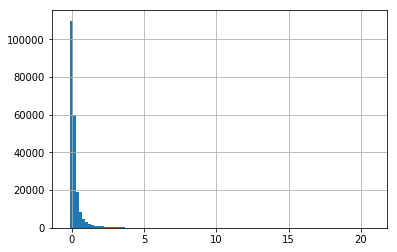

In [35]:
pd.Series(test_pred).hist(bins=100)

# get out of fold features

In [58]:
oof_train,_ = timeseries_cv('lgb',X,y,lgb_params,cv,root_mean_squared_error,150,True)

Training with params: 
{'colsample_bytree': 0.75, 'metric': 'rmse', 'min_data_in_leaf': 128, 'subsample': 0.75, 'learning_rate': 0.03, 'objective': 'regression', 'bagging_seed': 128, 'num_leaves': 128, 'bagging_freq': 1, 'seed': 1204, 'verbose': 1}
Train RMSE: 0.8060203656198298. Val RMSE: 0.842604340869596
Best iteration: 109
Train RMSE: 0.7187770224588755. Val RMSE: 0.7607151772408083
Best iteration: 845
Train RMSE: 0.7280455507519825. Val RMSE: 0.6960586737223564
Best iteration: 642
Train RMSE: 0.6881746410827226. Val RMSE: 0.7624647527297275
Best iteration: 1471
Train RMSE: 0.713518541419691. Val RMSE: 0.8757157548862285
Best iteration: 819
Train RMSE: 0.7476038494661554. Val RMSE: 0.915767486370869
Best iteration: 357
6 fold results: [0.842604340869596, 0.7607151772408083, 0.6960586737223564, 0.7624647527297275, 0.8757157548862285, 0.915767486370869]
Mean Cross Validation RMSE: 0.8088876976365976



In [60]:
oof_df = pd.Series(oof_train)
oof_df.to_pickle(data_path+'oof/lgb_best.pickle')